# Student grades prediction Project

Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
• All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
#Loading the dataset
grade_df = pd.read_csv("Grades.csv")
print("Successfully Imported Data!")
grade_df

Successfully Imported Data!


Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
5    CS-97006      A     B-      B        D+     C+     A-     C+      B   
6    CS-97007     B-     C-     A-         D     A-      B      A     B+   
7    CS-97008     B+     B+     C+         C      C     A-     C-     A-   
8    CS-97009     A-      C     A-        D+      B     A-     A-     A-   
9    CS-97010      A      B     C+         B      B     A-      C     B-   
10   CS-97011     A-     B-     B+        C-     C-     B-     C+     B-   
11   CS-97012     A-      C     A-        C+     C-      A     B-     B+   
12   CS-97013      B      C     A-         C     B-      B     D+      C   
13   CS-97014      A     C-     A-        C-      B     A-     C+     A-   
14   CS-97015      A      C     A-        C+     A-      A     B-     A-   
15   CS-97016     A-     C-     B-         D     B-     B+     B-     A-   
16   CS-97017     A-     C-      A        D+     A-      A      B     A-   
17   CS-97018     B-     C-      C         D      D     C+     D+      B   
18   CS-97019      A     C-      A        C+     A-      A     A-      A   
19   CS-97020     B+      C     A-        C-     A-     B+     A-     A-   
20   CS-97021     B+      C      B        D+     B-     C-     C-     C-   
21   CS-97022      B     B+     B-         C     A-     A-     D+     C+   
22   CS-97023     B+     C+     B-        C+     C-     A-     B-     C+   
23   CS-97024      A     A-      A        A-      A      A     B-     A-   
24   CS-97025      A     B-     A-         B     B+     A-      B      A   
25   CS-97026     C+     C-      C        C-      D     B-      D     C+   
26   CS-97027      A     B+      A        A-     A-      A     C+      A   
27   CS-97028      C     C+     D+        D+     C-     B+      D      C   
28   CS-97029     B+      B     A-        B+     B-      A      B     D+   
29   CS-97030      C     B-      C        D+      B      B     C+     C+   
30   CS-97031     A-      B      A        B+     B-     A-     B+      A   
31   CS-97032      A     C+     A-        C+     B+     A-     B-     B+   
32   CS-97033      B     C+      A        D+     A-      A     A-      A   
33   CS-97034      A     C+     A-         B     A-     B+     C-     B+   
34   CS-97035     B+     B-     A-         A     C+     A-      D     A-   
35   CS-97036      B     C+     B-        D+     B+     A-     B-     B+   
36   CS-97037     B+     B+     A-        B-     B+     A-     C+     B+   
37   CS-97038      B      C     A-        B-     B+      A      A     A-   
38   CS-97039     C-     C-      D         D     C+     C+     C-      D   
39   CS-97040     A-     A-     B+        B+     A-     A+     B+      A   
40   CS-97041     A-     B-     B-         C     A-      A      A     B-   
41   CS-97042      B      C     C+         C     D+     A-     D+     B-   
42   CS-97043     B+      C      B         C     B-     A-      D     A-   
43   CS-97044     C-     B+      C        B+     C+     A-     B+     B-   
44   CS-97045      D      C    NaN       NaN    NaN     C-    NaN    NaN   
45   CS-97046      B     B-     B-        D+     C-      C      D      B   
46   CS-97047     A-     C-     C+        C-      D     C+     D+     D+   
47   CS-97048     A-     B+     A-        A-      A     A+      A     A+   
48   CS-97049      A     A-      A        A-     A+     A+     A+      A   
49   CS-97050     A-     A-      A        A-     A-     A+     A-      A   
50   CS-97051     C+      D      C         D     D+      B     A-     C-   
51   CS-97052     C-      B     B-        B-      B  

In [79]:
grade_df.head(10)

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   
5  CS-97006      A     B-      B        D+     C+     A-     C+      B     B+   
6  CS-97007     B-     C-     A-         D     A-      B      A     B+     A-   
7  CS-97008     B+     B+     C+         C      C     A-     C-     A-      B   
8  CS-97009     A-      C     A-        D+      B     A-     A-     A-     B+   
9  CS-97010      A      B     C+         B      B     A-      C     B-     A-   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  
5  ...      C     B-     C+     C+     A-     A-     B+     B-      B  3.026  
6  ...     B-      C     B+     B-      A     A-     B+     B+      A  2.957  
7  ...     D+     B+     B+      C      A     B+     A-     A-     A-  3.043  
8  ...     B+      B     B-     C+      A     A-     B+     A-      A  3.358  
9  ...     C+     B-     B+     B-      A      A     A-      B      A  3.247  

[10 rows x 43 columns]

In [80]:
grade_df.tail(10)

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
561  CS-97562     B-      B     A-        B+     B-     B+     A-      A   
562  CS-97563      B      B      A         C      B     B+      B     C-   
563  CS-97564     A-      B      A        D+     B+     A-      C      A   
564  CS-97565     A-      D      A         C     B+     B+      C     A-   
565  CS-97566      F      F      D        C-    NaN     D+      D    NaN   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
561      B  ...     B+     B-     B+     D+     C+     B-     B+      C   
562     B+  ...     A-      B     B+     B+     B+     C+     A-     D+   
563     C+  ...     B+      C     B+     C-     C-      C      F      D   
564     B-  ...      B     C+     B+     D+      C     C-      B      C   
565    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
561     C+  2.828  
562     C+  2.821  
563      C  2.612  
564     B-  2.607  
565    NaN  0.800  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[10 rows x 43 columns]

In [81]:
grade_df.columns 

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [82]:
grade_df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
5    CS-97006      A     B-      B        D+     C+     A-     C+      B   
6    CS-97007     B-     C-     A-         D     A-      B      A     B+   
7    CS-97008     B+     B+     C+         C      C     A-     C-     A-   
8    CS-97009     A-      C     A-        D+      B     A-     A-     A-   
9    CS-97010      A      B     C+         B      B     A-      C     B-   
10   CS-97011     A-     B-     B+        C-     C-     B-     C+     B-   
11   CS-97012     A-      C     A-        C+     C-      A     B-     B+   
12   CS-97013      B      C     A-         C     B-      B     D+      C   
13   CS-97014      A     C-     A-        C-      B     A-     C+     A-   
14   CS-97015      A      C     A-        C+     A-      A     B-     A-   
15   CS-97016     A-     C-     B-         D     B-     B+     B-     A-   
16   CS-97017     A-     C-      A        D+     A-      A      B     A-   
17   CS-97018     B-     C-      C         D      D     C+     D+      B   
18   CS-97019      A     C-      A        C+     A-      A     A-      A   
19   CS-97020     B+      C     A-        C-     A-     B+     A-     A-   
20   CS-97021     B+      C      B        D+     B-     C-     C-     C-   
21   CS-97022      B     B+     B-         C     A-     A-     D+     C+   
22   CS-97023     B+     C+     B-        C+     C-     A-     B-     C+   
23   CS-97024      A     A-      A        A-      A      A     B-     A-   
24   CS-97025      A     B-     A-         B     B+     A-      B      A   
25   CS-97026     C+     C-      C        C-      D     B-      D     C+   
26   CS-97027      A     B+      A        A-     A-      A     C+      A   
27   CS-97028      C     C+     D+        D+     C-     B+      D      C   
28   CS-97029     B+      B     A-        B+     B-      A      B     D+   
29   CS-97030      C     B-      C        D+      B      B     C+     C+   
30   CS-97031     A-      B      A        B+     B-     A-     B+      A   
31   CS-97032      A     C+     A-        C+     B+     A-     B-     B+   
32   CS-97033      B     C+      A        D+     A-      A     A-      A   
33   CS-97034      A     C+     A-         B     A-     B+     C-     B+   
34   CS-97035     B+     B-     A-         A     C+     A-      D     A-   
35   CS-97036      B     C+     B-        D+     B+     A-     B-     B+   
36   CS-97037     B+     B+     A-        B-     B+     A-     C+     B+   
37   CS-97038      B      C     A-        B-     B+      A      A     A-   
38   CS-97039     C-     C-      D         D     C+     C+     C-      D   
39   CS-97040     A-     A-     B+        B+     A-     A+     B+      A   
40   CS-97041     A-     B-     B-         C     A-      A      A     B-   
41   CS-97042      B      C     C+         C     D+     A-     D+     B-   
42   CS-97043     B+      C      B         C     B-     A-      D     A-   
43   CS-97044     C-     B+      C        B+     C+     A-     B+     B-   
44   CS-97045      D      C    NaN       NaN    NaN     C-    NaN    NaN   
45   CS-97046      B     B-     B-        D+     C-      C      D      B   
46   CS-97047     A-     C-     C+        C-      D     C+     D+     D+   
47   CS-97048     A-     B+     A-        A-      A     A+      A     A+   
48   CS-97049      A     A-      A        A-     A+     A+     A+      A   
49   CS-97050     A-     A-      A        A-     A-     A+     A-      A   
50   CS-97051     C+      D      C         D     D+      B     A-     C-   
51   CS-97052     C-      B     B-        B-      B  

In [83]:
print('No of rows in the data set:- ',grade_df.shape[0])
print('No of columns in the data set:- ',grade_df.shape[1])

No of rows in the data set:-  571
No of columns in the data set:-  43


This dataset contains 571 rows and 43 Columns.

In [84]:
grade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

- This dataset contains all columns with object values except CGPA contains float values.

In [85]:
# Checking for null values if any
grade_df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

<AxesSubplot:>

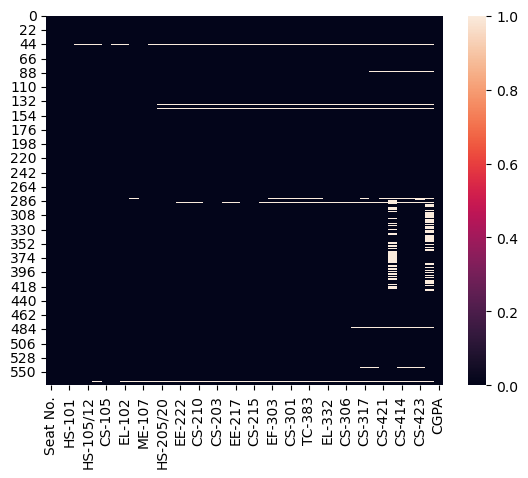

In [86]:
sns.heatmap(grade_df.isnull())

# Removing Null Values using Mode

In [87]:
categorical_columns = ['CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412']

# Compute mode for each categorical column
for col in categorical_columns:
    mode_value = grade_df[col].mode().iloc[0]  # Compute mode
    grade_df[col].fillna(mode_value, inplace=True)  # Fill missing values with mode


In [88]:
grade_df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

<AxesSubplot:>

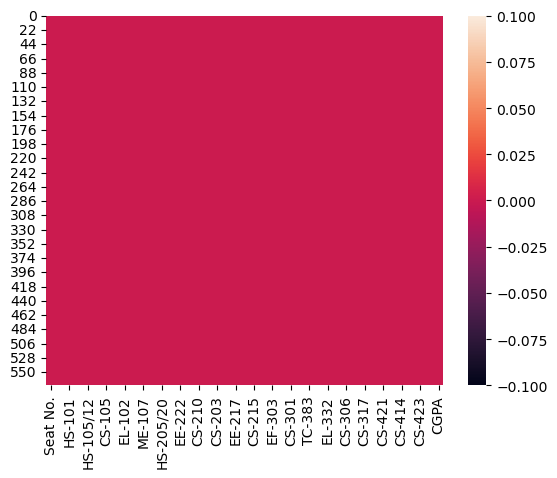

In [89]:
sns.heatmap(grade_df.isnull())

In [90]:
# Checking for white spaces
#pd.options.display.max_rows=None  #this check all the dataset
grade_df.loc[0:]==" "


Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0       False   False   False   False      False   False   False   False   
1       False   False   False   False      False   False   False   False   
2       False   False   False   False      False   False   False   False   
3       False   False   False   False      False   False   False   False   
4       False   False   False   False      False   False   False   False   
5       False   False   False   False      False   False   False   False   
6       False   False   False   False      False   False   False   False   
7       False   False   False   False      False   False   False   False   
8       False   False   False   False      False   False   False   False   
9       False   False   False   False      False   False   False   False   
10      False   False   False   False      False   False   False   False   
11      False   False   False   False      False   False   False   False   
12      False   False   False   False      False   False   False   False   
13      False   False   False   False      False   False   False   False   
14      False   False   False   False      False   False   False   False   
15      False   False   False   False      False   False   False   False   
16      False   False   False   False      False   False   False   False   
17      False   False   False   False      False   False   False   False   
18      False   False   False   False      False   False   False   False   
19      False   False   False   False      False   False   False   False   
20      False   False   False   False      False   False   False   False   
21      False   False   False   False      False   False   False   False   
22      False   False   False   False      False   False   False   False   
23      False   False   False   False      False   False   False   False   
24      False   False   False   False      False   False   False   False   
25      False   False   False   False      False   False   False   False   
26      False   False   False   False      False   False   False   False   
27      False   False   False   False      False   False   False   False   
28      False   False   False   False      False   False   False   False   
29      False   False   False   False      False   False   False   False   
30      False   False   False   False      False   False   False   False   
31      False   False   False   False      False   False   False   False   
32      False   False   False   False      False   False   False   False   
33      False   False   False   False      False   False   False   False   
34      False   False   False   False      False   False   False   False   
35      False   False   False   False      False   False   False   False   
36      False   False   False   False      False   False   False   False   
37      False   False   False   False      False   False   False   False   
38      False   False   False   False      False   False   False   False   
39      False   False   False   False      False   False   False   False   
40      False   False   False   False      False   False   False   False   
41      False   False   False   False      False   False   False   False   
42      False   False   False   False      False   False   False   False   
43      False   False   False   False      False   False   False   False   
44      False   False   False   False      False   False   False   False   
45      False   False   False   False      False   False   False   False   
46      False   False   False   False      False   False   False   False   
47      False   False   False   False      False   False   False   False   
48      False   False   False   False      False   False   False   False   
49      False   False   False   False      False   False   False   False   
50      False   False   False   False      False   False   False   False   
51      False   False   False   False      False   Fa

This dataset contains no white spaces

In [91]:
#Check for duplicate data
grade_df.duplicated().sum()

0

No duplicates in database

In [92]:
grade_df.nunique().to_frame('No of unique values')

No of unique values
Seat No.                   571
PH-121                      13
HS-101                      12
CY-105                      13
HS-105/12                   13
MT-111                      13
CS-105                      11
CS-106                      13
EL-102                      13
EE-119                      12
ME-107                      13
CS-107                      14
HS-205/20                   13
MT-222                      14
EE-222                      13
MT-224                      14
CS-210                      14
CS-211                      14
CS-203                      13
CS-214                      13
EE-217                      13
CS-212                      12
CS-215                      14
MT-331                      12
EF-303                      12
HS-304                      14
CS-301                      12
CS-302                      11
TC-383                      12
MT-442                      12
EL-332                      13
CS-318                      14
CS-306                      13
CS-312                      14
CS-317                      12
CS-403                      11
CS-421                      13
CS-406                      14
CS-414                      13
CS-419                      12
CS-423                      12
CS-412                      13
CGPA                       491

In [93]:
grade_df['CGPA'].max()

3.985

- Maximun CGPA score is 3.98.

In [94]:
grade_df['CGPA'].min()

0.8

- Minimum Happiness score is 0.8.

In [102]:
# Drop Seat No coloum beacuse its not affected on Prediction
grade_df.drop(['Seat No.'],axis=1,inplace=True)

In [103]:
from sklearn.preprocessing import LabelEncoder
cols=[ 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412',]

In [104]:
grade_df[cols] = grade_df[cols].apply(LabelEncoder().fit_transform)

In [105]:
grade_df

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         5      10       8          6       8      10       9       8   
1         0       9      10          9       5       6       9       0   
2         0       3       0          5       4       0       5       4   
3         9       7      10          9       9       2      10       8   
4         2       2       2          4       0       0       2       4   
5         0       5       3         10       7       2       7       3   
6         5       8       2          9       2       3       0       4   
7         4       4       7          6       6       2       8       2   
8         2       6       2         10       3       2       2       2   
9         0       3       7          3       3       2       6       5   
10        2       5       4          8       8       5       7       5   
11        2       6       2          7       8       0       5       4   
12        3       6       2          6       5       3      10       6   
13        0       8       2          8       3       2       7       2   
14        0       6       2          7       2       0       5       2   
15        2       8       5          9       5       4       5       2   
16        2       8       0         10       2       0       3       2   
17        5       8       6          9       9       7      10       3   
18        0       8       0          7       2       0       2       0   
19        4       6       2          8       2       4       2       2   
20        4       6       3         10       5       8       8       8   
21        3       4       5          6       2       2      10       7   
22        4       7       5          7       8       2       5       7   
23        0       2       0          2       0       0       5       2   
24        0       5       2          3       4       2       3       0   
25        7       8       6          8       9       5       9       7   
26        0       4       0          2       2       0       7       0   
27        6       7      10         10       8       4       9       6   
28        4       3       2          4       5       0       3      10   
29        6       5       6         10       3       3       7       7   
30        2       3       0          4       5       2       4       0   
31        0       7       2          7       4       2       5       4   
32        3       7       0         10       2       0       2       0   
33        0       7       2          3       2       4       8       4   
34        4       5       2          0       7       2       9       2   
35        3       7       5         10       4       2       5       4   
36        4       4       2          5       4       2       7       4   
37        3       6       2          5       4       0       0       2   
38        8       8       9          9       7       7       8       9   
39        2       2       4          4       2       1       4       0   
40        2       5       5          6       2       0       0       5   
41        3       6       7          6      10       2      10       5   
42        4       6       3          6       5       2       9       2   
43        8       4       6          4       7       2       4       5   
44        9       6       0          0       2       8       2       2   
45        3       5       5         10       8       6       9       3   
46        2       8       7          8       9       7      10      10   
47        2       4       2          2       0       1       0       1   
48        0       2       0          2       1       1       1       0   
49        2       2       0          2       2       1       2       0   
50        7       9       6          9      10       3       2       8   
51        8       3       5          5       3       4       9       5   
52        5       7       3          7       2       7       0       7   
53       

In [106]:
#Checking description of dataset
grade_df.describe()

PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     3.781086    5.071804    2.898424    4.241681    3.896673    2.838879   
std      3.046895    2.785317    2.964737    3.200507    2.988546    2.696709   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    3.000000    0.000000    2.000000    2.000000    0.000000   
50%      3.000000    5.000000    2.000000    4.000000    4.000000    2.000000   
75%      6.000000    7.000000    4.500000    7.000000    6.000000    4.000000   
max     12.000000   11.000000   12.000000   12.000000   12.000000   10.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  571.000000  571.000000  571.000000  571.000000  ...  571.000000   
mean     4.122592    3.959720    3.886165    4.779335  ...    4.071804   
std      2.727192    3.031436    2.657528    3.146202  ...    3.362345   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      2.000000    2.000000    2.000000    2.000000  ...    1.000000   
50%      4.000000    3.000000    3.000000    5.000000  ...    3.000000   
75%      5.000000    6.000000    6.000000    8.000000  ...    7.000000   
max     12.000000   12.000000   11.000000   12.000000  ...   13.000000   

           CS-317      CS-403      CS-421      CS-406      CS-414      CS-419  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     4.835377    3.432574    5.385289    2.984238    2.397548    3.856392   
std      2.740382    2.980685    2.729063    2.468346    2.499388    2.382769   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.000000    0.000000    3.000000    2.000000    0.000000    2.000000   
50%      5.000000    3.000000    5.000000    2.000000    2.000000    4.000000   
75%      7.000000    5.000000    7.000000    4.000000    4.000000    5.000000   
max     11.000000   10.000000   12.000000   13.000000   12.000000   11.000000   

           CS-423      CS-412        CGPA  
count  571.000000  571.000000  571.000000  
mean     3.966725    3.049037    2.954888  
std      2.795475    2.332316    0.620552  
min      0.000000    0.000000    0.800000  
25%      2.000000    2.000000    2.538000  
50%      4.000000    2.000000    3.029000  
75%      6.000000    4.000000    3.451000  
max     11.000000   12.000000    3.985000  

[8 rows x 42 columns]

<AxesSubplot:>

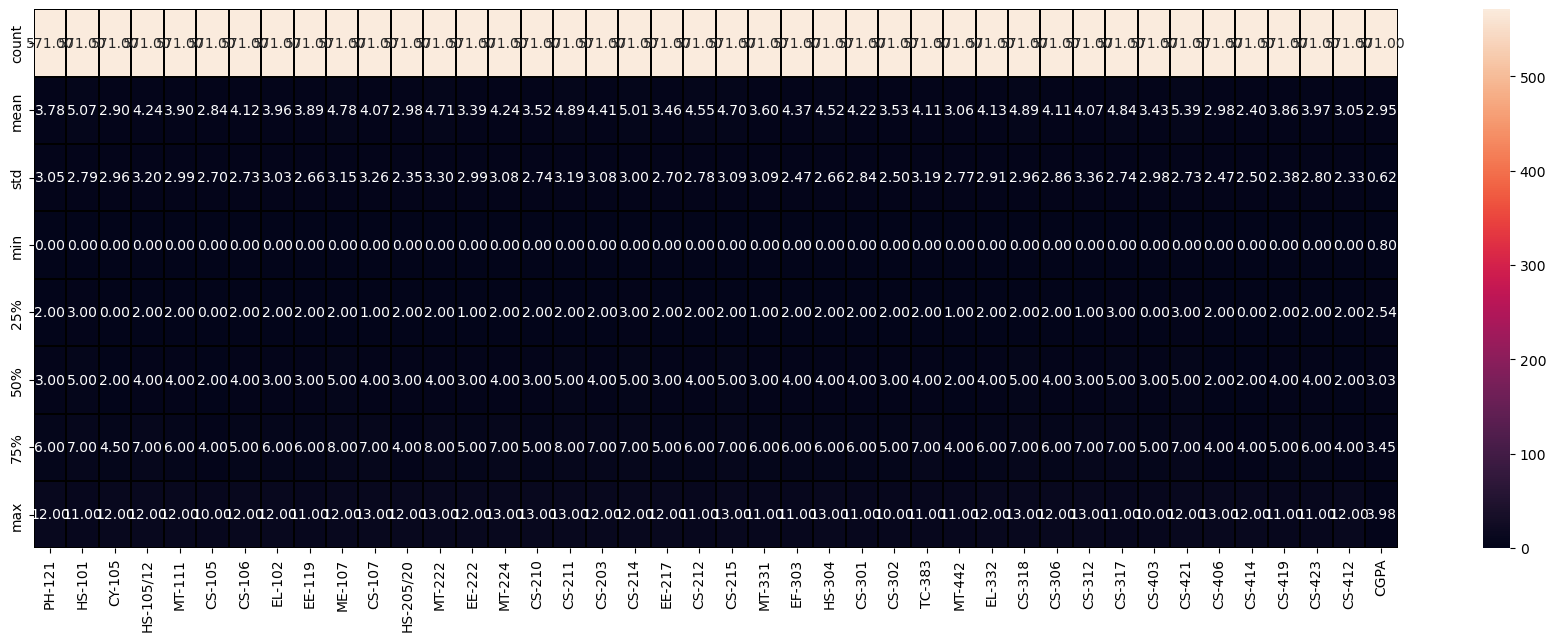

In [107]:
# visualize df.describe
plt.figure(figsize=(22,7))
sns.heatmap(grade_df.describe(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

# Checking For Skewness

In [108]:
grade_df.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.982144
HS-105/12    0.324183
MT-111       0.484906
CS-105       0.930769
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-210       0.723967
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217       0.724325
CS-212       0.414872
CS-215       0.163631
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442       0.869952
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403       0.618339
CS-421       0.179508
CS-406       1.522703
CS-414       1.292931
CS-419       0.506748
CS-423       0.526550
CS-412       1.329362
CGPA        -0.497203
dtype: float64

- Here it is clearly shown that No skewness in data

- we observe from above observation, skewness was removed from targeted three column Looks like normally distributed

# Checking Correlation

In [109]:
grade_df.corr()

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.382436  0.557843   0.498561  0.468968  0.609990   
HS-101     0.382436  1.000000  0.335074   0.473132  0.432742  0.400713   
CY-105     0.557843  0.335074  1.000000   0.510123  0.538380  0.578573   
HS-105/12  0.498561  0.473132  0.510123   1.000000  0.494731  0.482406   
MT-111     0.468968  0.432742  0.538380   0.494731  1.000000  0.393684   
CS-105     0.609990  0.400713  0.578573   0.482406  0.393684  1.000000   
CS-106     0.293963  0.312019  0.378223   0.499093  0.500729  0.286324   
EL-102     0.423942  0.349412  0.447539   0.360304  0.555895  0.353949   
EE-119     0.579964  0.309697  0.467250   0.400303  0.409161  0.507357   
ME-107     0.533558  0.336545  0.464418   0.320137  0.471685  0.455470   
CS-107     0.477761  0.495906  0.481277   0.540405  0.488977  0.503239   
HS-205/20  0.296428  0.178344  0.261281   0.179766  0.328574  0.192982   
MT-222     0.551805  0.391699  0.485371   0.459571  0.499415  0.477302   
EE-222     0.529273  0.381091  0.394398   0.379369  0.393494  0.487650   
MT-224     0.348024  0.265585  0.437339   0.392068  0.567848  0.259561   
CS-210     0.513314  0.322239  0.489937   0.462070  0.571972  0.440588   
CS-211     0.329882  0.335788  0.453911   0.352640  0.556099  0.342449   
CS-203     0.462853  0.263205  0.400036   0.295711  0.512505  0.410614   
CS-214     0.421076  0.461156  0.463044   0.413251  0.587102  0.414244   
EE-217     0.423468  0.328305  0.398219   0.357855  0.514243  0.339227   
CS-212     0.351823  0.340568  0.420848   0.455820  0.565169  0.321335   
CS-215     0.486069  0.401812  0.512438   0.453450  0.577513  0.456677   
MT-331     0.183034  0.173494  0.366648   0.259306  0.431197  0.231626   
EF-303     0.196272  0.240540  0.334633   0.384338  0.410918  0.196685   
HS-304     0.420629  0.418026  0.323331   0.345015  0.315129  0.456401   
CS-301     0.300945  0.313397  0.368489   0.415815  0.538492  0.230551   
CS-302     0.448213  0.345292  0.460447   0.419373  0.507059  0.426776   
TC-383     0.189226  0.320385  0.300547   0.397499  0.493420  0.214507   
MT-442     0.443980  0.226441  0.430456   0.320701  0.404591  0.407767   
EL-332     0.419078  0.378717  0.353731   0.354519  0.567875  0.360826   
CS-318     0.441321  0.404702  0.322503   0.373775  0.370270  0.444708   
CS-306     0.472384  0.432533  0.362537   0.484828  0.474400  0.418766   
CS-312     0.038184  0.213380  0.261555   0.263143  0.467946  0.059711   
CS-317     0.464022  0.364250  0.472137   0.478816  0.555098  0.387639   
CS-403     0.321264  0.229546  0.464575   0.451907  0.410540  0.279329   
CS-421     0.290351  0.301934  0.349827   0.415946  0.511463  0.236345   
CS-406     0.280166  0.265551  0.129957   0.168150  0.300391  0.237615   
CS-414     0.152437  0.225977  0.008774   0.142806  0.228637  0.121965   
CS-419     0.462770  0.284668  0.430053   0.465352  0.502473  0.306827   
CS-423     0.094921  0.228103  0.120885   0.235029  0.400679  0.045134   
CS-412     0.293815  0.226039  0.064912   0.153293  0.269792  0.179777   
CGPA      -0.663135 -0.537170 -0.658282  -0.613989 -0.730095 -0.613169   

             CS-106    EL-102    EE-119    ME-107  ...    CS-312    CS-317  \
PH-121     0.293963  0.423942  0.579964  0.533558  ...  0.038184  0.464022   
HS-101     0.312019  0.349412  0.309697  0.336545  ...  0.213380  0.364250   
CY-105     0.378223  0.447539  0.467250  0.464418  ...  0.261555  0.472137   
HS-105/12  0.499093  0.360304  0.400303  0.320137  ...  0.263143  0.478816   
MT-111     0.500729  0.555895  0.409161  0.471685  ...  0.467946  0.555098   
CS-105     0.286324  0.353949  0.507357  0.455470  ...  0.059711  0.387639   
CS-106     1.000000  0.338645  0.269895  0.281233  ...  0.450752  0.416562   
EL-102     0.338645  1.000000  0.448908  0.461690  ...  0.301324  0.466556   
EE-119     0.269895  0.448908  1.000000  0.572964  ...  0.156809  0.445496   
ME-107     0.281233  0.461690  0.572964  1.000000 

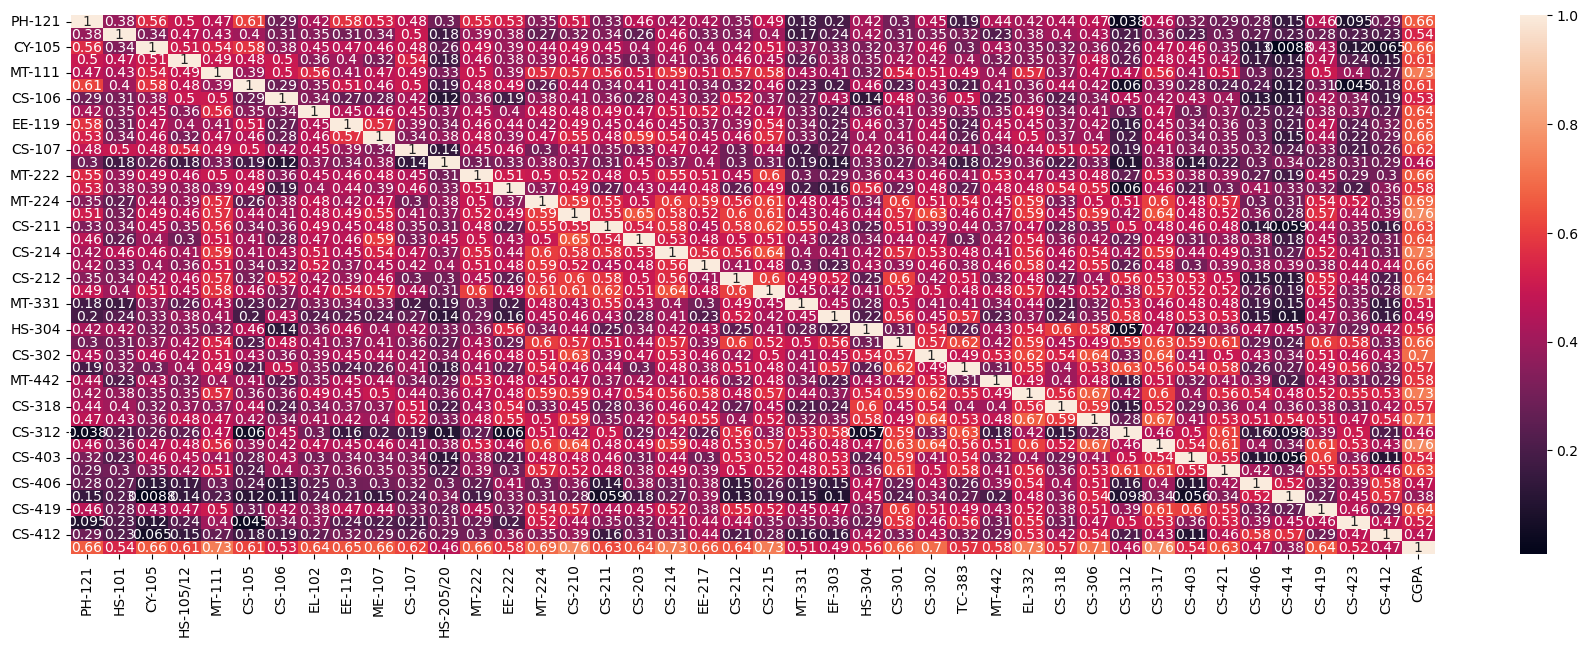

In [110]:
# Plot the heatmap
import matplotlib.pyplot as plt

df_corr=grade_df.corr().abs()
plt.figure(figsize=(22,7))
sns.heatmap(df_corr, annot=True)
plt.show()

In [111]:
df=grade_df
df

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         5      10       8          6       8      10       9       8   
1         0       9      10          9       5       6       9       0   
2         0       3       0          5       4       0       5       4   
3         9       7      10          9       9       2      10       8   
4         2       2       2          4       0       0       2       4   
5         0       5       3         10       7       2       7       3   
6         5       8       2          9       2       3       0       4   
7         4       4       7          6       6       2       8       2   
8         2       6       2         10       3       2       2       2   
9         0       3       7          3       3       2       6       5   
10        2       5       4          8       8       5       7       5   
11        2       6       2          7       8       0       5       4   
12        3       6       2          6       5       3      10       6   
13        0       8       2          8       3       2       7       2   
14        0       6       2          7       2       0       5       2   
15        2       8       5          9       5       4       5       2   
16        2       8       0         10       2       0       3       2   
17        5       8       6          9       9       7      10       3   
18        0       8       0          7       2       0       2       0   
19        4       6       2          8       2       4       2       2   
20        4       6       3         10       5       8       8       8   
21        3       4       5          6       2       2      10       7   
22        4       7       5          7       8       2       5       7   
23        0       2       0          2       0       0       5       2   
24        0       5       2          3       4       2       3       0   
25        7       8       6          8       9       5       9       7   
26        0       4       0          2       2       0       7       0   
27        6       7      10         10       8       4       9       6   
28        4       3       2          4       5       0       3      10   
29        6       5       6         10       3       3       7       7   
30        2       3       0          4       5       2       4       0   
31        0       7       2          7       4       2       5       4   
32        3       7       0         10       2       0       2       0   
33        0       7       2          3       2       4       8       4   
34        4       5       2          0       7       2       9       2   
35        3       7       5         10       4       2       5       4   
36        4       4       2          5       4       2       7       4   
37        3       6       2          5       4       0       0       2   
38        8       8       9          9       7       7       8       9   
39        2       2       4          4       2       1       4       0   
40        2       5       5          6       2       0       0       5   
41        3       6       7          6      10       2      10       5   
42        4       6       3          6       5       2       9       2   
43        8       4       6          4       7       2       4       5   
44        9       6       0          0       2       8       2       2   
45        3       5       5         10       8       6       9       3   
46        2       8       7          8       9       7      10      10   
47        2       4       2          2       0       1       0       1   
48        0       2       0          2       1       1       1       0   
49        2       2       0          2       2       1       2       0   
50        7       9       6          9      10       3       2       8   
51        8       3       5          5       3       4       9       5   
52        5       7       3          7       2       7       0       7   
53       

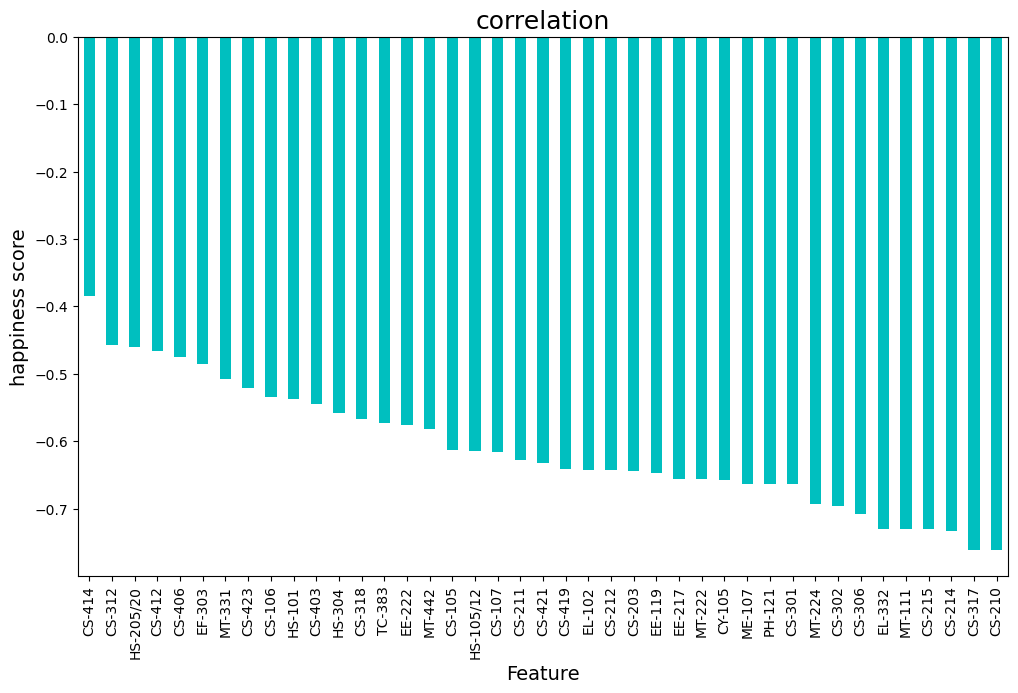

In [112]:
# Correlation of features with Target Column a)Average Cost for two
plt.figure(figsize=(12,7))
grade_df.corr()['CGPA'].sort_values(ascending=False).drop(['CGPA']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('happiness score',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# diving data in (features)x and (lables)y

In [113]:
# dropping Happiness rank beacuse having no use to predict happiness score
df=grade_df.drop(['CGPA'],axis=1)


In [114]:
x=df

In [115]:

y=grade_df['CGPA']

print('Features Diamension = ',x.shape)
print('Label Diamension = ',y.shape)

Features Diamension =  (571, 41)
Label Diamension =  (571,)


# Data Scaling

In [116]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale=pd.DataFrame(x_scale,columns=x.columns)

In [117]:
x=pd.DataFrame(data=x_scale)
x

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0    0.400402  1.770900  1.722261   0.549869  1.374222  2.657832  1.790004   
1   -1.242052  1.411559  2.397448   1.488043  0.369509  1.173242  1.790004   
2   -1.242052 -0.744483 -0.978490   0.237145  0.034605 -1.053643  0.322008   
3    1.714365  0.692879  2.397448   1.488043  1.709126 -0.311348  2.157003   
4   -0.585070 -1.103823 -0.303302  -0.075580 -1.305012 -1.053643 -0.778989   
5   -1.242052 -0.025802  0.034291   1.800767  1.039317 -0.311348  1.056006   
6    0.400402  1.052219 -0.303302   1.488043 -0.635204  0.059800 -1.512987   
7    0.071911 -0.385142  1.384667   0.549869  0.704413 -0.311348  1.423005   
8   -0.585070  0.333538 -0.303302   1.800767 -0.300299 -0.311348 -0.778989   
9   -1.242052 -0.744483  1.384667  -0.388304 -0.300299 -0.311348  0.689007   
10  -0.585070 -0.025802  0.371885   1.175318  1.374222  0.802095  1.056006   
11  -0.585070  0.333538 -0.303302   0.862594  1.374222 -1.053643  0.322008   
12  -0.256579  0.333538 -0.303302   0.549869  0.369509  0.059800  2.157003   
13  -1.242052  1.052219 -0.303302   1.175318 -0.300299 -0.311348  1.056006   
14  -1.242052  0.333538 -0.303302   0.862594 -0.635204 -1.053643  0.322008   
15  -0.585070  1.052219  0.709479   1.488043  0.369509  0.430947  0.322008   
16  -0.585070  1.052219 -0.978490   1.800767 -0.635204 -1.053643 -0.411990   
17   0.400402  1.052219  1.047073   1.488043  1.709126  1.544390  2.157003   
18  -1.242052  1.052219 -0.978490   0.862594 -0.635204 -1.053643 -0.778989   
19   0.071911  0.333538 -0.303302   1.175318 -0.635204  0.430947 -0.778989   
20   0.071911  0.333538  0.034291   1.800767  0.369509  1.915537  1.423005   
21  -0.256579 -0.385142  0.709479   0.549869 -0.635204 -0.311348  2.157003   
22   0.071911  0.692879  0.709479   0.862594  1.374222 -0.311348  0.322008   
23  -1.242052 -1.103823 -0.978490  -0.701029 -1.305012 -1.053643  0.322008   
24  -1.242052 -0.025802 -0.303302  -0.388304  0.034605 -0.311348 -0.411990   
25   1.057383  1.052219  1.047073   1.175318  1.709126  0.802095  1.790004   
26  -1.242052 -0.385142 -0.978490  -0.701029 -0.635204 -1.053643  1.056006   
27   0.728893  0.692879  2.397448   1.800767  1.374222  0.430947  1.790004   
28   0.071911 -0.744483 -0.303302  -0.075580  0.369509 -1.053643 -0.411990   
29   0.728893 -0.025802  1.047073   1.800767 -0.300299  0.059800  1.056006   
30  -0.585070 -0.744483 -0.978490  -0.075580  0.369509 -0.311348 -0.044991   
31  -1.242052  0.692879 -0.303302   0.862594  0.034605 -0.311348  0.322008   
32  -0.256579  0.692879 -0.978490   1.800767 -0.635204 -1.053643 -0.778989   
33  -1.242052  0.692879 -0.303302  -0.388304 -0.635204  0.430947  1.423005   
34   0.071911 -0.025802 -0.303302  -1.326478  1.039317 -0.311348  1.790004   
35  -0.256579  0.692879  0.709479   1.800767  0.034605 -0.311348  0.322008   
36   0.071911 -0.385142 -0.303302   0.237145  0.034605 -0.311348  1.056006   
37  -0.256579  0.333538 -0.303302   0.237145  0.034605 -1.053643 -1.512987   
38   1.385874  1.052219  2.059854   1.488043  1.039317  1.544390  1.423005   
39  -0.585070 -1.103823  0.371885  -0.075580 -0.635204 -0.682495 -0.044991   
40  -0.585070 -0.025802  0.709479   0.549869 -0.635204 -1.053643 -1.512987   
41  -0.256579  0.333538  1.384667   0.549869  2.044030 -0.311348  2.157003   
42   0.071911  0.333538  0.034291   0.549869  0.369509 -0.311348  1.790004   
43   1.385874 -0.385142  1.047073  -0.075580  1.039317 -0.311348 -0.044991   
44   1.714365  0.333538 -0.978490  -1.326478 -0.635204  1.915537 -0.778989   
45  -0.256579 -0.025802  0.709479   1.800767  1.374222  1.173242  1.790004   
46  -0.585070  1.052219  1.384667   1.175318  1.709126  1.544390  2.157003   
47  -0.585070 -0.385142 -0.303302  -0.701029 -1.305012 -0.682495 -1.512987   
48  -1.242052 -1.103823 -0.978490  -0.701029 -0.970108 -0.682495 -1.145988   
49  -0.585070 -1.103823 -0.978490  -0.701029 -0.635204 -0.682495 -0.778989   
50   1.057383  1.411559  1.04

- We scaled the data using Standerd Scalarization

# Checking Multi-Collinearity

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_function():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

vif_function()

    VIF Factor   Features
0     2.827608     PH-121
1     1.771294     HS-101
2     2.514966     CY-105
3     2.293035  HS-105/12
4     2.638921     MT-111
5     2.366597     CS-105
6     1.927701     CS-106
7     1.968027     EL-102
8     2.190768     EE-119
9     2.294552     ME-107
10    2.350875     CS-107
11    1.633210  HS-205/20
12    2.277248     MT-222
13    2.254361     EE-222
14    2.798314     MT-224
15    3.084264     CS-210
16    2.640904     CS-211
17    2.612616     CS-203
18    2.688396     CS-214
19    2.435192     EE-217
20    2.770283     CS-212
21    3.022915     CS-215
22    2.052599     MT-331
23    2.113301     EF-303
24    2.498852     HS-304
25    3.095874     CS-301
26    2.741509     CS-302
27    2.889101     TC-383
28    2.027056     MT-442
29    3.275353     EL-332
30    2.355677     CS-318
31    3.471549     CS-306
32    3.239651     CS-312
33    3.161398     CS-317
34    2.504472     CS-403
35    2.813594     CS-421
36    2.166488     CS-406
37    2.2948

- We can see no column having high VIF, and thus we can say multicollinearity is not present in the columns

# Data Modelling

In [128]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [129]:
# Finding Best Random State
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 score is ",maxAccu," on Random_state ",maxRS)

Maximum R2 score is  0.9643494726169242  on Random_state  72


# Splitting data into Train-Test

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [131]:
x_train.shape

(399, 41)

In [132]:
x_test.shape

(172, 41)

In [133]:
y_train.shape

(399,)

In [134]:
y_test.shape

(172,)

# 1. Linear Regression

In [135]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_lr)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_lr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_lr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_lr)*100))

R2 score on test data  96.43494726169241
R2 score on train data  91.39022616556755
Mean Absolute Error  8.938340774408557
Mean Squared Error: 1.3741931476875233
Root Meand Squared Error: 1.1722598464877672


In [136]:
# cv score for Linear Regression 
cvlr=cross_val_score(lr,x,y,cv=5).mean()
print('CV score  for Linear rgerssion:',cvlr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_lr)-cvlr)

CV score  for Linear rgerssion: 0.9034513625626615
And Difference between CV and r2_score = 0.06089811005426271


# 2. Support Vector Regressor

In [137]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_svr)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_svr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_svr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_svr)*100))

R2 score on test data  97.21144817654248
R2 score on train data  96.06739452297576
Mean Absolute Error  7.683844583277179
Mean Squared Error: 1.074881380180095
Root Meand Squared Error: 1.036764862531565


In [138]:
# cv score for Support Vector Regressor
cvsvr=cross_val_score(svr,x,y,cv=5).mean()
print('CV score  for Support Vector Regressor:',cvsvr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_svr)-cvsvr)

CV score  for Support Vector Regressor: 0.9051669400105776
And Difference between CV and r2_score = 0.06694754175484707


# 3. Decision Tree Regressor

In [139]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_dtr)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_dtr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_dtr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_dtr)*100))

R2 score on test data  87.42048018517004
R2 score on train data  100.0
Mean Absolute Error  16.857558139534884
Mean Squared Error: 4.84892965116279
Root Meand Squared Error: 2.202028530960212


In [140]:
# cv score for Decision Tree Regressor
cvdtr=cross_val_score(dtr,x,y,cv=5).mean()
print('CV score  for Decision Tree Regressor:',cvdtr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_dtr)-cvdtr)

CV score  for Decision Tree Regressor: 0.789408407566252
And Difference between CV and r2_score = 0.08479639428544838


# 4. K Neighbors Regressor

In [141]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_knn)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_knn)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_knn)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_knn)*100))

R2 score on test data  97.17167269517839
R2 score on train data  91.67450579640872
Mean Absolute Error  8.034767441860463
Mean Squared Error: 1.090213325581395
Root Meand Squared Error: 1.0441328103174399


In [142]:
# cv score for K Neighbors Regressor
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print('CV score  for K Neighbors Regressor:',cvknn)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_knn)-cvknn)

CV score  for K Neighbors Regressor: 0.891850920275352
And Difference between CV and r2_score = 0.07986580667643195


# 5.Random Forest Regressor

In [143]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_rfr)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_rfr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_rfr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_rfr)*100))

R2 score on test data  94.11705829540679
R2 score on train data  98.43816598486058
Mean Absolute Error  11.030593023255799
Mean Squared Error: 2.2676517774418556
Root Meand Squared Error: 1.5058724306666404


In [144]:
# cv score for Random Forest Regressor
cvrfr=cross_val_score(rfr,x,y,cv=5).mean()
print('CV score  for Random Forest Regressor:',cvrfr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_rfr)-cvrfr)

CV score  for Random Forest Regressor: 0.9076029574780884
And Difference between CV and r2_score = 0.03356762547597947


# 6.Ada Boost Regressor

In [145]:
adr=AdaBoostRegressor()
adr.fit(x_train,y_train)
pred_adr=adr.predict(x_test)
pred_train=adr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_adr)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_adr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_adr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_adr)*100))

R2 score on test data  90.38539399061538
R2 score on train data  93.3060892884108
Mean Absolute Error  16.117160406692737
Mean Squared Error: 3.7060673896464773
Root Meand Squared Error: 1.9251149029724115


In [146]:
# cv score for Ada Boost Regressor
cvadr=cross_val_score(adr,x,y,cv=5).mean()
print('CV score  for Ada Boost Regressor:',cvadr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_adr)-cvadr)

CV score  for Ada Boost Regressor: 0.8649182813148041
And Difference between CV and r2_score = 0.03893565859134973


# 7.Gradient Boosting Regressor

In [147]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_gbr)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_gbr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_gbr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_gbr)*100))

R2 score on test data  96.73090484653831
R2 score on train data  99.53002375042729
Mean Absolute Error  8.242251129600549
Mean Squared Error: 1.2601126796116253
Root Meand Squared Error: 1.1225474063983336


In [148]:
# cv score for Gradient Boosting Regressor
cvgbr=cross_val_score(gbr,x,y,cv=5).mean()
print('CV score  for Gradient Boosting Regressor:',cvgbr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_gbr)-cvgbr)

CV score  for Gradient Boosting Regressor: 0.9322801189017669
And Difference between CV and r2_score = 0.03502892956361625


# 8. Lasso Regression

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [150]:
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_ls)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_ls)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_ls)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_ls)*100))


R2 score on test data  89.58862325250129
R2 score on train data  84.09312307862744
Mean Absolute Error  16.23825681239466
Mean Squared Error: 4.013192408255341
Root Meand Squared Error: 2.0032953871696857


In [151]:
# cv score for Lasso Regression
cvls=cross_val_score(ls,x,y,cv=5).mean()
print('CV score  for Lasso Regression:',cvls)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_ls)-cvls)

CV score  for Lasso Regression: 0.8275355996197252
And Difference between CV and r2_score = 0.06835063290528776


# 9. Ridge Regression

In [152]:
rg=Ridge(alpha=0.1)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
pred_train=rg.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_rg)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_rg)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_rg)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_rg)*100))


R2 score on test data  96.43723145289485
R2 score on train data  91.39022509881389
Mean Absolute Error  8.935528092510872
Mean Squared Error: 1.3733126782726714
Root Meand Squared Error: 1.171884242693224


In [153]:
# cv score forRidge Regression
cvrg=cross_val_score(rg,x,y,cv=5).mean()
print('CV score  for Ridge Regression:',cvrg)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_rg)-cvrg)

CV score  for Ridge Regression: 0.9034693559322896
And Difference between CV and r2_score = 0.06090295859665895


# We can see r2 score on train and test data is good in Gradient Boosting Regressor

# We can choose Gradient Boosting Regressor

# Hyper Parameter Tuning

In [154]:
gbr.get_params() # Getting Liner Regression Parameters

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [157]:
from sklearn.model_selection import GridSearchCV

parameter = {'criterion':['friedman_mse'], 
             'alpha':[0.9],
             'n_estimators': [100],
             'learning_rate':[0.1],
              'max_depth':[3] }

In [158]:
# Start Tuning 
gbr=GradientBoostingRegressor()
GCV = GridSearchCV(gbr,parameter,cv=5)
GCV.fit(x_train,y_train)
print(GCV.best_params_) 

{'alpha': 0.9, 'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [159]:
model=GradientBoostingRegressor(alpha= 0.9,criterion='friedman_mse', learning_rate= 0.1, max_depth= 3, n_estimators= 100)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("R2 score on test data ",r2_score(y_test,pred)*100)

print("Mean Absolute Error ",mean_absolute_error(y_test,pred)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred)*100))



R2 score on test data  96.65551707986111
Mean Absolute Error  8.29965884718936
Mean Squared Error: 1.2891718156165726
Root Meand Squared Error: 1.1354170227791076


# Saving the best Regressor model

In [160]:
import joblib

joblib.dump(model,'model.obj')

['model.obj']

In [161]:
best_model=joblib.load('model.obj')

In [162]:
# Viewing Attributes of the best model
best_model

GradientBoostingRegressor()

In [163]:
original = np.array(y_test)
predicted = np.array(best_model.predict(x_test))
df_new1 = pd.DataFrame({"Original":original,"Predicted":predicted},index= range(len(original)))
df_new1.sample(10)

Original  Predicted
159     2.938   3.051397
138     3.765   3.753123
99      3.970   3.964483
165     2.782   2.756472
63      3.721   3.707080
166     2.321   2.141935
123     3.863   3.861342
132     2.193   2.482824
66      2.552   2.680822
116     2.971   2.942445

Text(0.5, 1.0, 'Original vs predicted  graph')

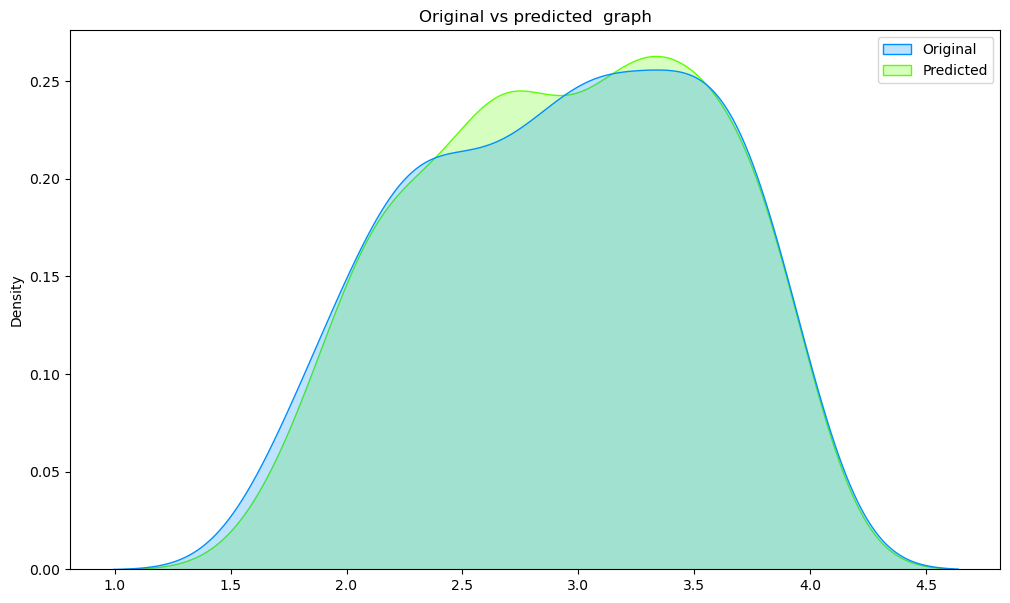

In [164]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new1, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

- We can see the the predicted graph follows original graph majorly